# **VISUALIZING OUR RESULTS**

<br>
<br>


To get a better understanding of our results, lets make some visualizations.

<br>
<br>

First, we must prepare everything to load our dataset and models...

<br>

---

<br>

## **Preparing Kernel Session**

<br>


In [2]:
# PREPARING OUR KERNEL SESSION TO LOAD SERIALIZED MODELS

import torch
import joblib
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error
import os
import json
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


# custom definitions
from src.classes.VGGUdeaSpectral import VGGUdeaSpectral
from src.classes.MultipleRegressionModel import MultipleRegressionModel


def rmse_score(net, X, y):
    y_pred = net.predict(X)
    rmse = (mean_squared_error(y_true=y, y_pred=y_pred)) ** 0.5
    return -rmse  # Skorch tries to maximize the score, so negate the RMSE

<br>

---

## **Loading Models**

<br>
<br>

In [3]:
## LOADING MODEL VGGUdeaSpectral

from src.classes.VGGUdeaSpectral import VGGUdeaSpectral


vgg_model = joblib.load("src/trained_models/VGGUdeaSpectral0/VGGUdeaSpectral_model0.joblib")

vgg_model

RandomizedSearchCV(cv=3,
                   estimator=<class 'skorch.regressor.NeuralNetRegressor'>[uninitialized](
  module=<class 'src.classes.VGGUdeaSpectral.VGGUdeaSpectral'>,
  module__num_bands=3,
),
                   param_distributions={'lr': [0.01, 0.001, 0.0001],
                                        'max_epochs': [5, 10, 20],
                                        'module__activation_type': ['relu',
                                                                    'sigmoid',
                                                                    'tanh'],
                                        'module__dropout_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fa4e583f2b0>,
                                        'module__fc1_out_features': [512, 1024,
                                                                     2048],
                                        'module__fc2_out_features': [256, 512,
                                                                     1024],
                                        'module__num_filters1': [32, 64, 128],
                                        'module__num_filters2': [64, 128, 256],
                                        'module__num_filters3': [128, 256,
                                                                 512]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=3)

In [4]:
## LOADING MODEL MultipleRegression

from src.classes.VGGUdeaSpectral import VGGUdeaSpectral


multiple_regression_model = joblib.load("src/trained_models/MultipleRegression4/MultipleRegression_model4.joblib")

multiple_regression_model

GridSearchCV(cv=3, estimator=MultipleRegressionModel(), n_jobs=2,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'positive': [False]},
             scoring='neg_mean_absolute_error', verbose=3)

---

<br>

<br>

## Loading Tensors

<br>



In [5]:
# Load the tensors from 2020

X_train_tensor = torch.load('X_tensor.pth')
y_train_tensor = torch.load('y_tensor.pth').view(-1,1)

# Print the shapes and data types of the tensors
print("Shape of X_tensor:", X_train_tensor.shape)
print("Data type of X_tensor:", X_train_tensor.dtype)
print("Number of elements in X_tensor:", torch.numel(X_train_tensor))

print("Shape of y_tensor:", y_train_tensor.shape)
print("Data type of y_tensor:", y_train_tensor.dtype)
print("Number of elements in y_tensor:", torch.numel(y_train_tensor))

# Calculate the size in bytes
print("Size of X_tensor in bytes:", X_train_tensor.element_size() * X_train_tensor.nelement())
print("Size of y_tensor in bytes:", y_train_tensor.element_size() * y_train_tensor.nelement())

Shape of X_tensor: torch.Size([64106, 3, 100, 100])
Data type of X_tensor: torch.uint8
Number of elements in X_tensor: 1923180000
Shape of y_tensor: torch.Size([64106, 1])
Data type of y_tensor: torch.float32
Number of elements in y_tensor: 64106
Size of X_tensor in bytes: 1923180000
Size of y_tensor in bytes: 256424


In [6]:
# Load the tensors from 2019

X_test_tensor = torch.load('X_test_tensor.pth')
y_test_tensor = torch.load('y_test_tensor.pth').view(-1,1)

# Print the shapes and data types of the tensors
print("Shape of X_tensor:", X_test_tensor.shape)
print("Data type of X_tensor:", X_test_tensor.dtype)
print("Number of elements in X_tensor:", torch.numel(X_test_tensor))

print("Shape of y_tensor:", y_test_tensor.shape)
print("Data type of y_tensor:", y_test_tensor.dtype)
print("Number of elements in y_tensor:", torch.numel(y_test_tensor))

# Calculate the size in bytes
print("Size of X_tensor in bytes:", X_test_tensor.element_size() * X_test_tensor.nelement())
print("Size of y_tensor in bytes:", y_test_tensor.element_size() * y_test_tensor.nelement())

Shape of X_tensor: torch.Size([64106, 3, 100, 100])
Data type of X_tensor: torch.uint8
Number of elements in X_tensor: 1923180000
Shape of y_tensor: torch.Size([64106, 1])
Data type of y_tensor: torch.float32
Number of elements in y_tensor: 64106
Size of X_tensor in bytes: 1923180000
Size of y_tensor in bytes: 256424


<br>

<br>

---

<br>

<br>

## **Plotting our RESULTS vs. GROUND TRUTH**

First, lets make a scatter plot. We will trace on the `X Axis` **the ground truth** [our `y_true`] and on the `Y Axis` our `y_pred`.

<br>

We will check on the data on which we trained (2020) and also on completely new data (2019).

<br>

---

<br>

## **With our 2020 (train) Sentinel-2 Data**

<br>

In [11]:
## FOR VGGUdeaSpectral

# Convert X to float32
X_train_tensor = X_train_tensor.to(dtype=torch.float32)

predictions_train = vgg_model.predict(X_train_tensor)

# If  y is a PyTorch tensor, you need to convert it to a NumPy array
y_np_train = y_train_tensor.cpu().numpy() if isinstance(y_train_tensor, torch.Tensor) else y_train_tensor


y_true_train = y_np_train  #  ground truth values
y_pred_train = predictions_train  #  predicted values

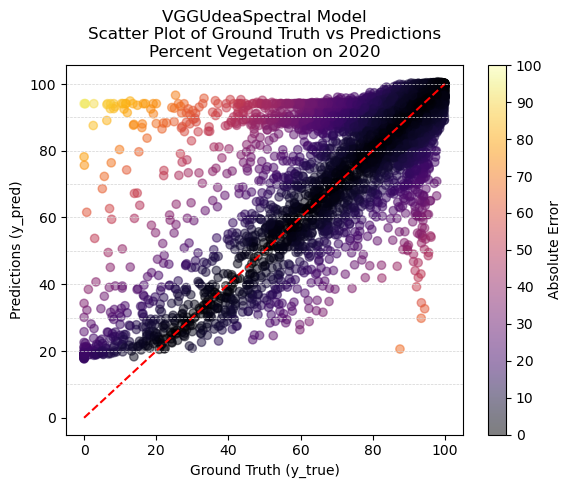

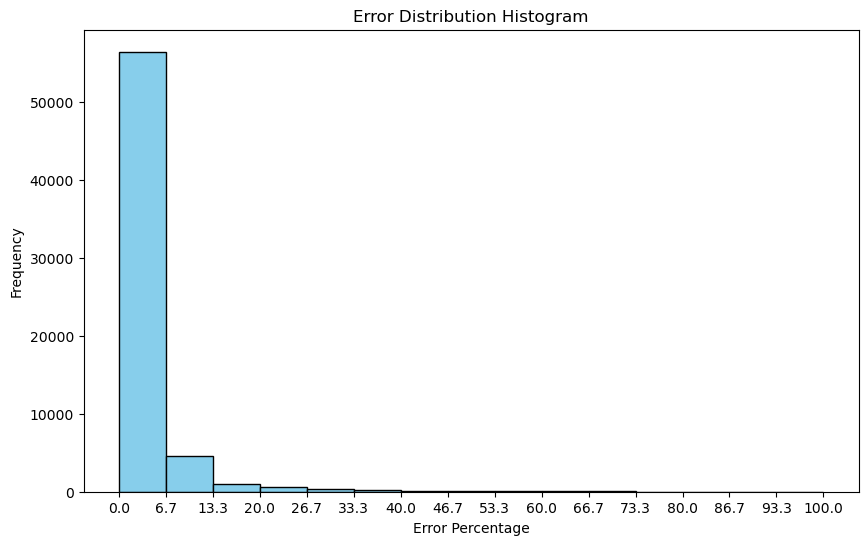

In [12]:
from src.utils import scatter_plot_predictions, plot_error_distribution

scatter_plot_predictions(y_true_train,
                        y_pred_train,
                        title="VGGUdeaSpectral Model\nScatter Plot of Ground Truth vs Predictions\nPercent Vegetation on 2020",
                        color_map='inferno'
                    )


plot_error_distribution(y_true_train, y_pred_train, n_bins=16)

In [13]:
## for MultipleRegressor

# Convert X to float32
X_train_tensor = X_train_tensor.to(dtype=torch.float32)

# Flatten the images
X_train = X_train_tensor.view(X_train_tensor.size(0), -1)

predictions_train = multiple_regression_model.predict(X_train)

y_np_train = y_train_tensor.cpu().numpy() if isinstance(y_train_tensor, torch.Tensor) else y_train_tensor


y_true_train = y_np_train  # ground truth values
y_pred_train = predictions_train.reshape(-1, 1)  # predicted values



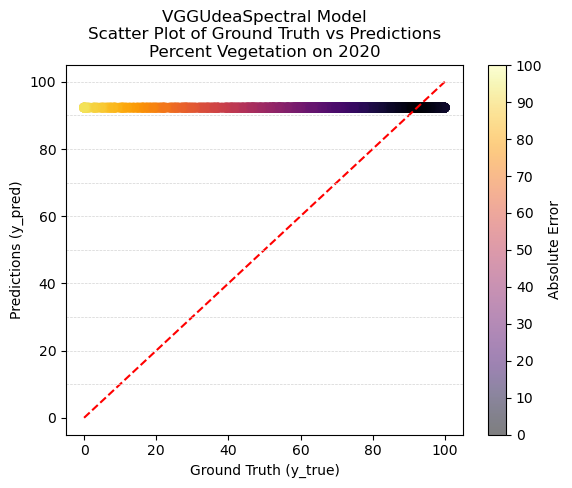

/home/felipera/projects/udeai_forest/src/utils.py:202: RuntimeWarning: divide by zero encountered in divide
  error_percent = (errors / y_true) * 100  # Convert errors to percentage of y_true


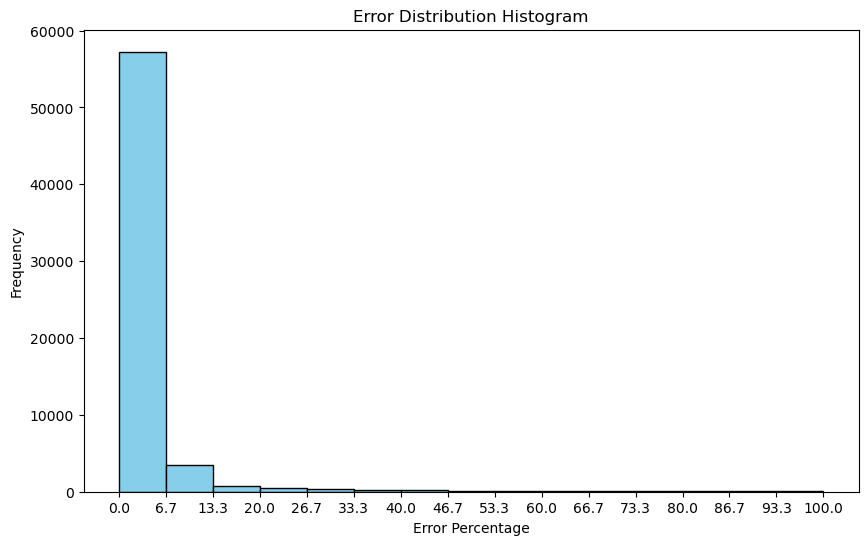

In [14]:
from src.utils import scatter_plot_predictions, plot_error_distribution

scatter_plot_predictions(y_true_train,
                        y_pred_train,
                        title="VGGUdeaSpectral Model\nScatter Plot of Ground Truth vs Predictions\nPercent Vegetation on 2020",
                        color_map='inferno'
                    )


plot_error_distribution(y_true_train, y_pred_train, n_bins=16)

---

<br>

## **With our 2019 (test) Sentinel-2 Data**

<br>

In [6]:
# Convert X to float32
X_test_tensor = X_test_tensor.to(dtype=torch.float32)

predictions_test = vgg_model.predict(X_test_tensor)

# If  y is a PyTorch tensor, you need to convert it to a NumPy array
y_np_test = y_test_tensor.cpu().numpy() if isinstance(y_test_tensor, torch.Tensor) else y_test_tensor


y_true_test = y_np_test  # ground truth values
y_pred_test = predictions_test  # predicted values

y_true_test.shape, y_pred_test.shape

((64106, 1), (64106, 1))

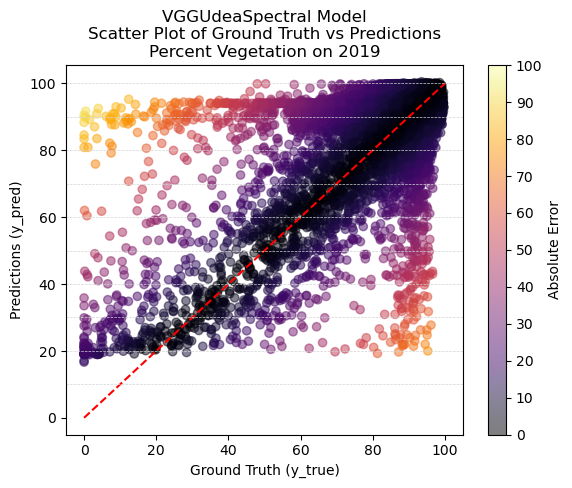

/home/felipera/projects/udeai_forest/src/utils.py:197: RuntimeWarning: divide by zero encountered in divide
  y_true (array-like): The ground truth values.


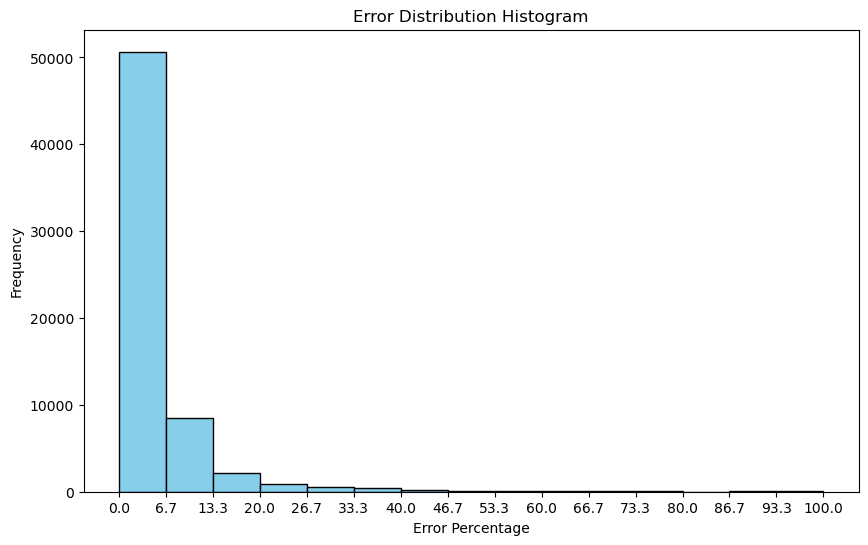

In [17]:
from src.utils import scatter_plot_predictions, plot_error_distribution

scatter_plot_predictions(y_true_test,
                        y_pred_test,
                        title="VGGUdeaSpectral Model\nScatter Plot of Ground Truth vs Predictions\nPercent Vegetation on 2019",
                        color_map='inferno'
                    )


plot_error_distribution(y_true_test, y_pred_test, n_bins=16)

In [9]:
## for MultipleRegressor

# Convert X to float32
X_test_tensor = X_test_tensor.to(dtype=torch.float32)

# Flatten the images
X_test = X_test_tensor.view(X_test_tensor.size(0), -1)

predictions_test = multiple_regression_model.predict(X_test)

y_np_test = y_test_tensor.cpu().numpy() if isinstance(y_test_tensor, torch.Tensor) else y_test_tensor


y_true_test = y_np_test  # ground truth values
y_pred_test = predictions_test.reshape(-1, 1)  # predicted values



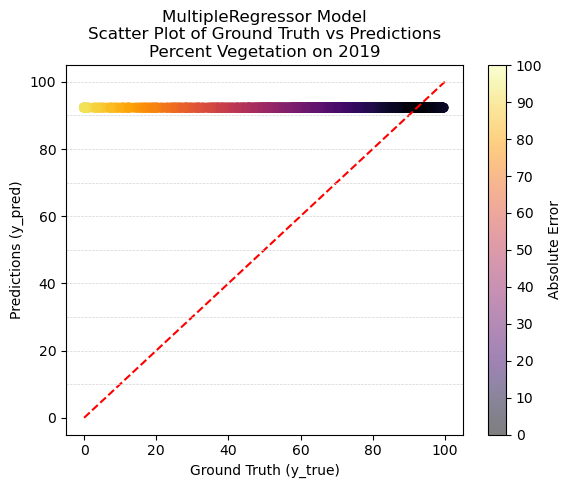

/home/felipera/projects/udeai_forest/src/utils.py:202: RuntimeWarning: divide by zero encountered in divide
  error_percent = (errors / y_true) * 100  # Convert errors to percentage of y_true


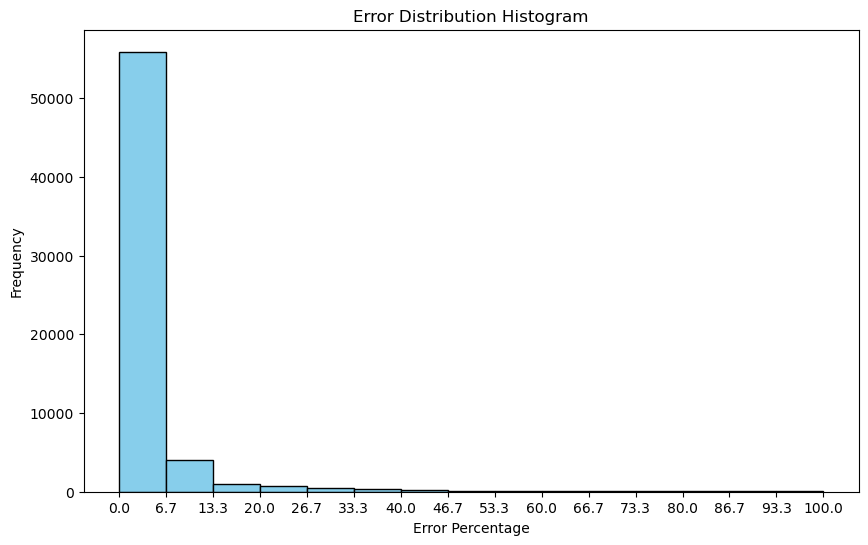

In [10]:
from src.utils import scatter_plot_predictions, plot_error_distribution

scatter_plot_predictions(y_true_test,
                        y_pred_test,
                        title="MultipleRegressor Model\nScatter Plot of Ground Truth vs Predictions\nPercent Vegetation on 2019",
                        color_map='inferno'
                    )


plot_error_distribution(y_true_test, y_pred_test, n_bins=16)